In this assignment about outliers, we are using the dataset after imputing missing values.  See [this notebook](https://github.com/yscyang1/Thinkful_Data_Science/blob/master/Exercises/Supervised%20Learning%20Model%20Preparation/Data%20Cleaning%202%20Missing%20Values.ipynb) for how I handled missing values.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('useducation-Cleaned.csv')

For this assignment, I will drop any null values.

In [3]:
df.dropna(axis=0, inplace=True)

### 1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

#### 1.1 - Visualization
First, to determine if either variable has outliers, I will do a visual inspection using a box plot with whiskers set to the default of 1.5 * standard deviation from the 1st and 3rd quartile.

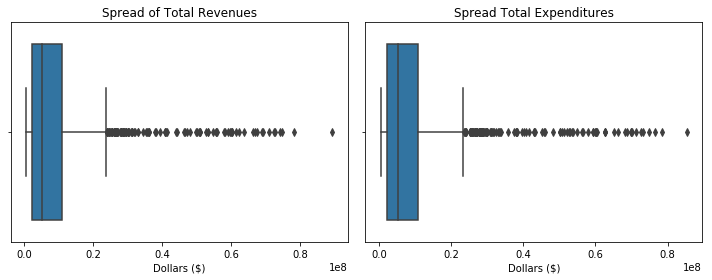

In [4]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(x = 'TOTAL_REVENUE', data = df, ax = axis1)
sns.boxplot(x = 'TOTAL_EXPENDITURE', data = df, ax = axis2)

axis1.set_title('Spread of Total Revenues')
axis2.set_title('Spread Total Expenditures')

for ax in [axis1, axis2]:
    ax.set_xlabel('Dollars ($)')

plt.tight_layout()

**According to the box plot, yes there are outliers.**  The outliers are past ~$25,000,000 for both total revenue and expenditures.  

#### 1.2 - A Statistical Approach

A more mathematical approach can be used with the Tukey's method and z score.  First, I will look at Tukey's method with a threshold at 1.5.  This should match the results of the box plots above.

In [29]:
def tukeys_method(col_name, threshold, is_log = False):
    q75, q25 = np.percentile(df[col_name], [75, 25])
    if is_log:
        q75, q25 = np.percentile(np.log(df[col_name]), [75, 25])
    print('For {}, 1st Quartile is at {} and 3rd Quartile is at {}'.format(col_name, q25, q75))
    iqr = q75 - q25
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    if is_log:
        print('The number of outliers for {} is {}'.format(col_name, len(np.where(np.log(df[col_name]) > max_val)[0]) | len(np.where(np.log(df[col_name]) < min_val)[0])))
    else:
        print('The number of outliers for {} is {}'.format(col_name, len(np.where(df[col_name] > max_val)[0]) | len(np.where(df[col_name] < min_val)[0])))
    

In [60]:
tukeys_method('TOTAL_REVENUE', 1.5)

For TOTAL_REVENUE, 1st Quartile is at 2189503.5 and 3rd Quartile is at 10845163.0
The number of outliers for TOTAL_REVENUE is 113


In [61]:
tukeys_method('TOTAL_EXPENDITURE', 1.5)

For TOTAL_EXPENDITURE, 1st Quartile is at 2170404.0 and 3rd Quartile is at 10744201.5
The number of outliers for TOTAL_EXPENDITURE is 114


**Using Tukey's method with a threshold of 1.5, the total revenue and expenditures have a similar number of outliers at 113 and 114 respectively.**  What if we used the z-score?  For this, I will show the number of outliers for a threshold between 1 and 4.

In [71]:
def get_zscore(col_name, min_range, max_range):
    z_score = zscore(df[col_name])
    for threshold in range(min_range, max_range):
        print('Thre threshold is {}'.format(threshold))
        print('THe number of outliers in {} is {}'.format(col_name, len(np.where(z_score > threshold)[0])))

In [72]:
get_zscore('TOTAL_REVENUE', 1,5)

Thre threshold is 1
THe number of outliers in TOTAL_REVENUE is 141
Thre threshold is 2
THe number of outliers in TOTAL_REVENUE is 55
Thre threshold is 3
THe number of outliers in TOTAL_REVENUE is 39
Thre threshold is 4
THe number of outliers in TOTAL_REVENUE is 22


In [73]:
get_zscore('TOTAL_EXPENDITURE', 1,5)

Thre threshold is 1
THe number of outliers in TOTAL_EXPENDITURE is 141
Thre threshold is 2
THe number of outliers in TOTAL_EXPENDITURE is 56
Thre threshold is 3
THe number of outliers in TOTAL_EXPENDITURE is 40
Thre threshold is 4
THe number of outliers in TOTAL_EXPENDITURE is 24


**Overall, both the visual inspection and statistical methods show that there are outliers in the total revenue and expenditures.**

### 2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them

If the data is skewed, one way to make the data more normally distributed is to take the log of the data.  Below on the left, I show the distribution plots of the original total revenue and expenditure.  As the box plots above indicated, these are right skewed.  On the right are the log transformations of the revenue and expenditure.  Notice that the data is more normally distributed, although the x axis is on a different scale.  

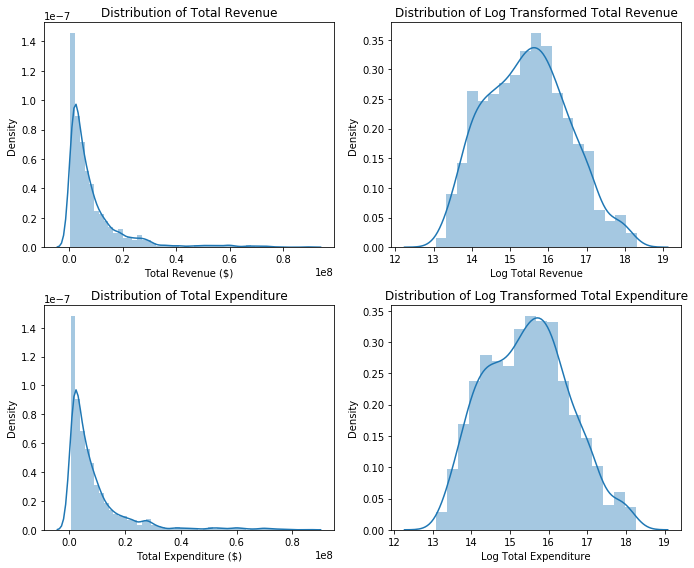

In [78]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(10,8))

sns.distplot(df['TOTAL_REVENUE'], ax = axis1)
sns.distplot(np.log(df['TOTAL_REVENUE']), ax = axis2)
sns.distplot(df['TOTAL_EXPENDITURE'], ax = axis3)
sns.distplot(np.log(df['TOTAL_EXPENDITURE']), ax = axis4)

axis1.set_title('Distribution of Total Revenue')
axis2.set_title('Distribution of Log Transformed Total Revenue')
axis3.set_title('Distribution of Total Expenditure')
axis4.set_title('Distribution of Log Transformed Total Expenditure')

axis1.set_xlabel('Total Revenue ($)')
axis2.set_xlabel('Log Total Revenue')
axis3.set_xlabel('Total Expenditure ($)')
axis4.set_xlabel('Log Total Expenditure')

for ax in [axis1, axis2, axis3, axis4]:
    ax.set_ylabel('Density')

plt.tight_layout()

Now that I have more normally distributed data, I can apply Tukey's method to check for any outliers.  **There are no more outliers.**

In [88]:
tukeys_method('TOTAL_REVENUE', 1.5, True)

For TOTAL_REVENUE, 1st Quartile is at 14.599185276152806 and 3rd Quartile is at 16.199229678312342
The number of outliers for TOTAL_REVENUE is 0


In [89]:
tukeys_method('TOTAL_EXPENDITURE', 1.5, True)

For TOTAL_EXPENDITURE, 1st Quartile is at 14.590423783021777 and 3rd Quartile is at 16.189876770608244
The number of outliers for TOTAL_EXPENDITURE is 0


As an example of why I didn't choose to winsorize, I graphed the winsorized data of total revenues below.  The distribution become binomial and does not fix the skew.  In addition, I believe it is a better practice to transform the data as a whole instead of part of the data unless we know the outliers are some sort of error.

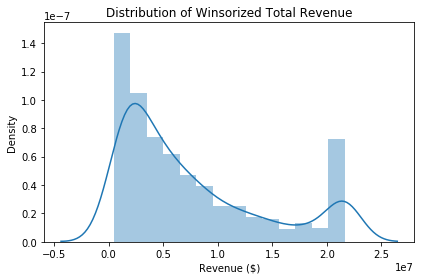

In [98]:
sns.distplot(winsorize(df['TOTAL_REVENUE'], [0,0.1]))
plt.title('Distribution of Winsorized Total Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Density')
plt.tight_layout()

### 3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [9]:
df['Raw_Budget_Deficit'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

Below, I've plotted box and distribution plots for the raw budget deficit.  The data is centerd around 0, but there are some data points that are very much in debt or are very rich.  **Tukey's method shows there are 125 outliers in the raw budget **deficit.  

Since the data is already close to normally distributed, winsorization would be a good choice to remove outliers.  In this case, since the outliers are on both sides, I will use a two way winsorization.

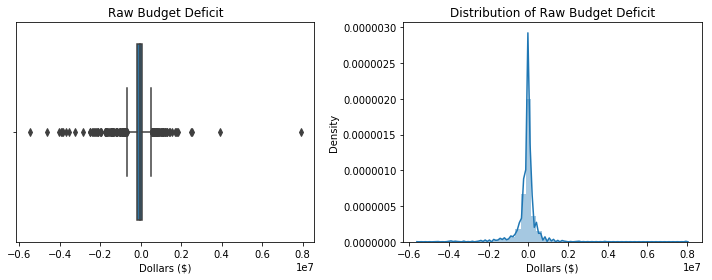

In [11]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(x = 'Raw_Budget_Deficit', data = df, whis = 2, ax = axis1)
sns.distplot(df['Raw_Budget_Deficit'], ax = axis2)

axis1.set_title('Raw Budget Deficit')
axis2.set_title('Distribution of Raw Budget Deficit')
axis2.set_ylabel('Density')

for ax in [axis1, axis2]:
    ax.set_xlabel('Dollars ($)')
    
plt.tight_layout()

In [142]:
tukeys_method('Raw_Budget_Deficit', 2)

For Raw_Budget_Deficit, 1st Quartile is at -181986.5 and 3rd Quartile is at 51362.5
The number of outliers for Raw_Budget_Deficit is 125


Below, I've plotted the winsorized budget deficit using an 80% winsorization.  **Both the charts and Tukey's method show there are no more outliers.**  Note that what percent of winsorization is important, as a 90% winsorization still has 93 outliers with a whisper of 2.  

In [26]:
df['Win_Raw_Budget'] = winsorize(df["Raw_Budget_Deficit"], [0.1, 0.1])

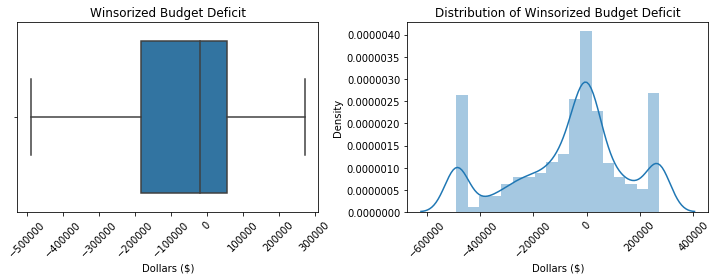

In [27]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(x = 'Win_Raw_Budget', data = df, whis = 2, ax = axis1)
sns.distplot(df['Win_Raw_Budget'], ax = axis2)

axis1.set_title('Winsorized Budget Deficit')
axis2.set_title('Distribution of Winsorized Budget Deficit')
axis2.set_ylabel('Density')

ax.xaxis.set_tick_params
for ax in [axis1, axis2]:
    ax.set_xlabel('Dollars ($)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()

In [30]:
tukeys_method('Win_Raw_Budget', 2)

For Win_Raw_Budget, 1st Quartile is at -181986.5 and 3rd Quartile is at 55885.0
The number of outliers for Win_Raw_Budget is 0


### 4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them

In [31]:
df['log_raw_budget'] = np.log(df['TOTAL_REVENUE']) - np.log(df['TOTAL_EXPENDITURE'])

Again, I start off with a box plot and distribution of the log transformed raw budget.  Despite the log transformed revenue and expenditure not having any outliers, **this log transformed data does have outliers.  **

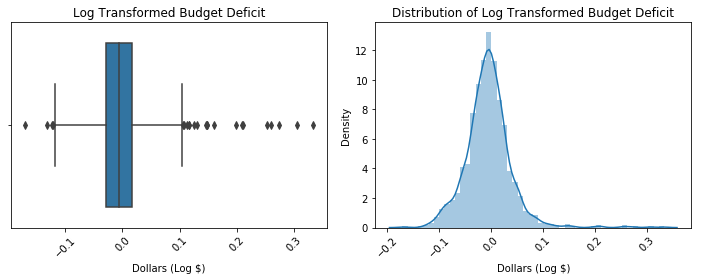

In [32]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(x = 'log_raw_budget', data = df, whis = 2, ax = axis1)
sns.distplot(df['log_raw_budget'], ax = axis2)

axis1.set_title('Log Transformed Budget Deficit')
axis2.set_title('Distribution of Log Transformed Budget Deficit')
axis2.set_ylabel('Density')

ax.xaxis.set_tick_params
for ax in [axis1, axis2]:
    ax.set_xlabel('Dollars (Log $)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()

In [145]:
tukeys_method('log_raw_budget', 2)

For log_raw_budget, 1st Quartile is at -0.029215469092552127 and 3rd Quartile is at 0.01557473906507223
The number of outliers for log_raw_budget is 22


Seeing as there are outliers on both sides of the mean, I will use a 90% two way winsorization.  **This winsorization successfully eliminates any outliers.**

In [146]:
df['win_log_raw_budget'] = winsorize(df['log_raw_budget'], [0.05, 0.05])

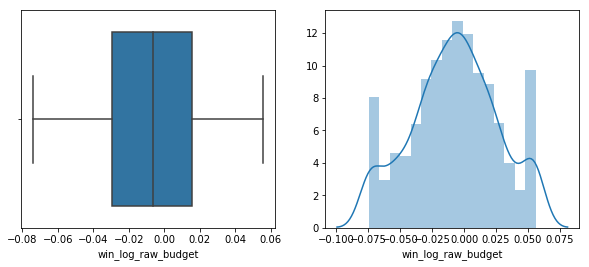

In [147]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.boxplot(x = 'win_log_raw_budget', data = df, whis = 2, ax = axis1)
sns.distplot(df['win_log_raw_budget'], ax = axis2)

In [148]:
tukeys_method('win_log_raw_budget', 2)

For win_log_raw_budget, 1st Quartile is at -0.029215469092552127 and 3rd Quartile is at 0.01557473906507223
The number of outliers for win_log_raw_budget is 0


### 5) Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [151]:
df[['Raw_Budget_Deficit', 'Win_Raw_Budget', 'win_log_raw_budget']].describe()

,Raw_Budget_Deficit,Win_Raw_Budget,win_log_raw_budget
count,1.331000e+03,1331.000000,1331.000000
mean,-1.073036e+05,-79387.196844,-0.007422
std,5.737859e+05,308145.680284,0.033922
min,-5.487742e+06,-921134.000000,-0.074211
25%,-1.819865e+05,-181986.500000,-0.029215
50%,-2.205000e+04,-22050.000000,-0.006444
75%,5.136250e+04,51362.500000,0.015575
max,3.897129e+06,474306.000000,0.055872


Means, standard deviations, minx, and maxes are all quite different for the raw budget and transformed budgets.  

### 6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

The method of the third question has less manipulation of the data, so generally that would be more a more appropriate method.